In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
bikes_hour=pd.read_csv("hour.csv")
bikes_day=pd.read_csv("day.csv")

In [3]:
bikes_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bikes_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
bikes_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bikes_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [7]:
bikes_hour = bikes_hour.drop(['casual' , 'registered'], axis=1)


In [8]:
bikes_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [20]:
bikes_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in bikes_hour.columns:
    bikes_hour[col] = le.fit_transform(bikes_hour[col])
    
bikes_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,6,0,0,11,19,72,0,15
1,1,0,0,0,0,1,0,6,0,0,10,18,71,0,39
2,2,0,0,0,0,2,0,6,0,0,10,18,71,0,31
3,3,0,0,0,0,3,0,6,0,0,11,19,66,0,12
4,4,0,0,0,0,4,0,6,0,0,11,19,66,0,0


In [25]:
bikes_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,366.172622,1.501640,0.502561,5.537775,11.546752,0.028770,3.003683,0.682721,0.425283,23.849358,31.400714,53.687611,5.122504,187.961275
std,5017.0295,210.072051,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,9.627806,11.340698,19.170875,4.059661,179.707814
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4344.5000,184.000000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,0.000000,16.000000,22.000000,39.000000,2.000000,39.000000
50%,8689.0000,366.000000,2.000000,1.000000,6.000000,12.000000,0.000000,3.000000,1.000000,0.000000,24.000000,32.000000,54.000000,5.000000,141.000000
75%,13033.5000,548.000000,2.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,1.000000,32.000000,41.000000,69.000000,7.000000,280.000000
max,17378.0000,730.000000,3.000000,1.000000,11.000000,23.000000,1.000000,6.000000,1.000000,3.000000,49.000000,64.000000,88.000000,29.000000,868.000000


Text(0, 0.5, 'Count of all Biks Rented')

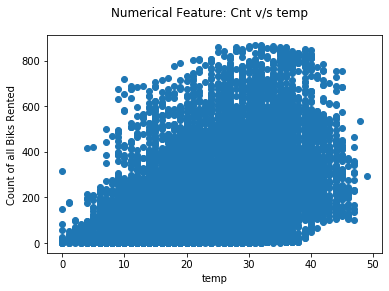

In [26]:
plt.scatter(bikes_hour['temp'], bikes_hour['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

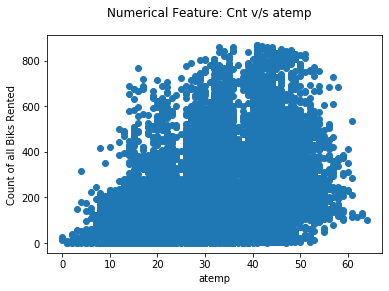

In [27]:
plt.scatter(bikes_hour['atemp'], bikes_hour['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

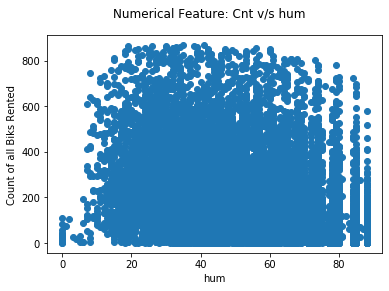

In [28]:
plt.scatter(bikes_hour['hum'], bikes_hour['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

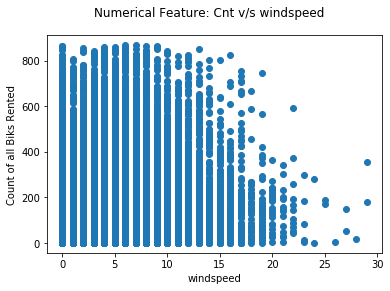

In [29]:
plt.scatter(bikes_hour['windspeed'], bikes_hour['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

In [37]:
bikes_df_model_data = bikes_hour.copy()
outcome = 'cnt'
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]
X_train, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)


In [48]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 137.70
